# Churn Rates: Predictive Analysis

In [1]:
options(jupyter.plot_mimetypes = "image/png")

**Group Members:** Kevin Liu, Wanxin luo, Manya Narwal, Sri Chaitanya
<br>
**Student Numbers:** 94200474, 33432808, 65439507, 54719646
<br>
**Group#** 38

# Background

In this project, we use an IBM sample dataset to perform a predictive analysis to solve a business problem by predicting customer churn rates from https://www.kaggle.com/datasets/blastchar/telco-customer-churn/code. This dataset contains Telco's customer churn based on various factors. These various factors include the following:
   - Services provided to each customer
   - Demographic information about each customer
   - Customer Account Information

 

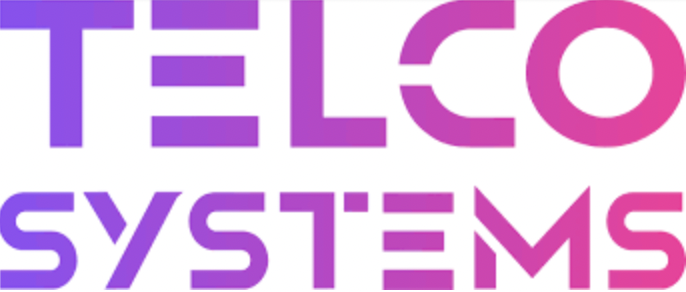

# Introduction

Churn rate, also known as the attrition rate, is a business metric that calculates the rate at which a customer unsubscribes from a service or product within a given period (Frankenfield, 2022). For instance, a 5% churn rate means that 5% of a company's total customers have stopped using its product or service. It is a measure of the company's overall performance and can also be a good indicator of customer service and customer retention.

For a company to grow and generate profit, it is important that the number of new customers exceeds the churn rate. This is especially important in the telecommunication industry as customers can easily switch between service providers (Almohaimmeed, 2019). The average churn rate in telecom businesses is 22% which is higher than in other industries such as IT or professional services.

By calculating the churn rate we can predict how well the business is retaining its customers, how the quality of its product or service has changed with time and, how the company has changed in its brand image. Conversely, we can also predict how the customer demographic is changing if the companys' product remains the same. If there is a steady increase in the companys' churn rate they can take appropriate measures to avoid further losses. These may include but not be limited to improving their customer services, quality of service, or the pricing model.


# Methods & Results

## Methods

This report aims to be an accurate and powerful tool for companies. This report strives to be trustworthy using the following steps:
1. Verification of the data source
2. Thorough EDA
3. Following statistical principles and avoiding violations

For this report, we will use numerous methods. A few such methods include Backward stepwise selection & Logistic regression to create models with multiple input variables.

We will be creating a predictive model to predict churn rate. Our study comprises of multiple sections encompassing data wrangling and splitting, EDA, model development (creation and testing), results, and discussion.

Having the tools to predict churn rates can be beneficial to various companies in diverse sectors. The main benefit is an insight into how well a company can retain customers, which can be used to calculate profit margins and forecasts.

### Data Preprocessing

In [2]:
# loading libraries
library(tidyverse)
library(repr)
library(digest)
library(infer)
library(cowplot)
library(broom)
library(faux)
library(GGally)
library(ggplot2)
library(glmnet)
library(gridExtra)
library(caret)
library(pROC)
library(boot)
library(gridExtra) 
library(car)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

************
Welcome to faux. For support and examples visit:
https://debruine.github.io/faux/
- Get and set global package options with: faux_options()
************


Attaching package: ‘faux’


The following object is masked from ‘package:purrr’:

    %||%


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loaded glmnet 4.1-2


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combi

We first load the dataset from local directory and have a glimpse of the first 6 rows of the dataset.

In [3]:
# Loading dataset
churn <- read.csv("WA_Fn-UseC_-Telco-Customer-Churn.csv", stringsAsFactors = TRUE)
head(churn)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,⋯,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
,<fct>,<fct>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>
1,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,⋯,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,⋯,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,⋯,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,⋯,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
5,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,⋯,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
6,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,⋯,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes


The dataset contains 21 features, and each row represents a customer. The variables (columns) includes useful information about customers' demographic information and service account information.

In [4]:
str(churn)

'data.frame':	7043 obs. of  21 variables:
 $ customerID      : Factor w/ 7043 levels "0002-ORFBO","0003-MKNFE",..: 5376 3963 2565 5536 6512 6552 1003 4771 5605 4535 ...
 $ gender          : Factor w/ 2 levels "Female","Male": 1 2 2 2 1 1 2 1 1 2 ...
 $ SeniorCitizen   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Partner         : Factor w/ 2 levels "No","Yes": 2 1 1 1 1 1 1 1 2 1 ...
 $ Dependents      : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 2 1 1 2 ...
 $ tenure          : int  1 34 2 45 2 8 22 10 28 62 ...
 $ PhoneService    : Factor w/ 2 levels "No","Yes": 1 2 2 1 2 2 2 1 2 2 ...
 $ MultipleLines   : Factor w/ 3 levels "No","No phone service",..: 2 1 1 2 1 3 3 2 3 1 ...
 $ InternetService : Factor w/ 3 levels "DSL","Fiber optic",..: 1 1 1 1 2 2 2 1 2 1 ...
 $ OnlineSecurity  : Factor w/ 3 levels "No","No internet service",..: 1 3 3 3 1 1 1 3 1 3 ...
 $ OnlineBackup    : Factor w/ 3 levels "No","No internet service",..: 3 1 3 1 1 1 3 1 1 3 ...
 $ DeviceProtection: Factor w/ 3 levels "No","

The feature SeniorCitizen is a binary variable contains 0 and 1, so we transfer the type to factor, and we can remove the customerID because this variable is unique for each row and would be be useless for our prediction. We also found that there are some missing values in TotalCharges, since there're only 11 missing values, we just directly deleted them from the current dataset.

In [5]:
churn$SeniorCitizen <- as.factor(churn$SeniorCitizen)
churn <- churn %>% drop_na() %>% select(-customerID)

### Preliminary Results

We first visualize the distribution of the response variable -- Churn.

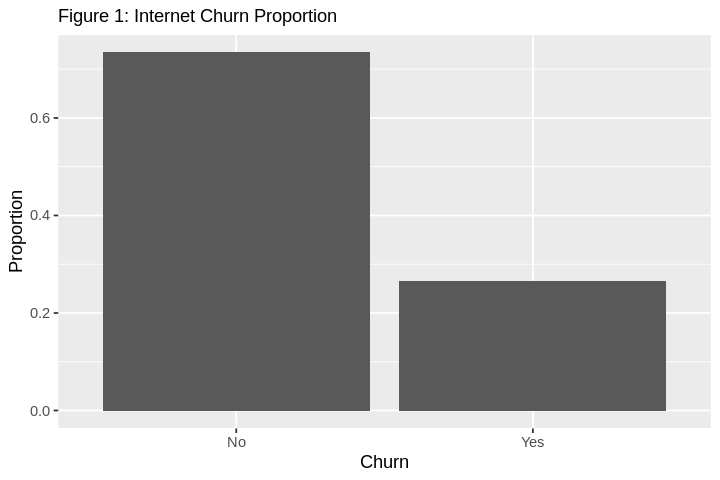

In [6]:
options(repr.plot.width = 6, repr.plot.height = 4)
internet_plot <- ggplot(churn, aes(x = Churn)) + 
                 geom_bar(aes(y = (..count..)/sum(..count..))) +
                 labs(y = "Proportion", fill = "Churn", subtitle = "Figure 1: Internet Churn Proportion")

internet_plot

In [7]:
internet_prop =  churn %>% 
                 group_by(Churn) %>% 
                 summarise(prop = n() / nrow(churn))

internet_prop

Churn,prop
<fct>,<dbl>
No,0.734215
Yes,0.265785


From the above Figure 1, we can see that Telco had a churn rate of approximately 26.58% for the given time period.

We then analyze and visualize the the categorical variables in our dataset by creating bar plots.

[1] "Figure 2"


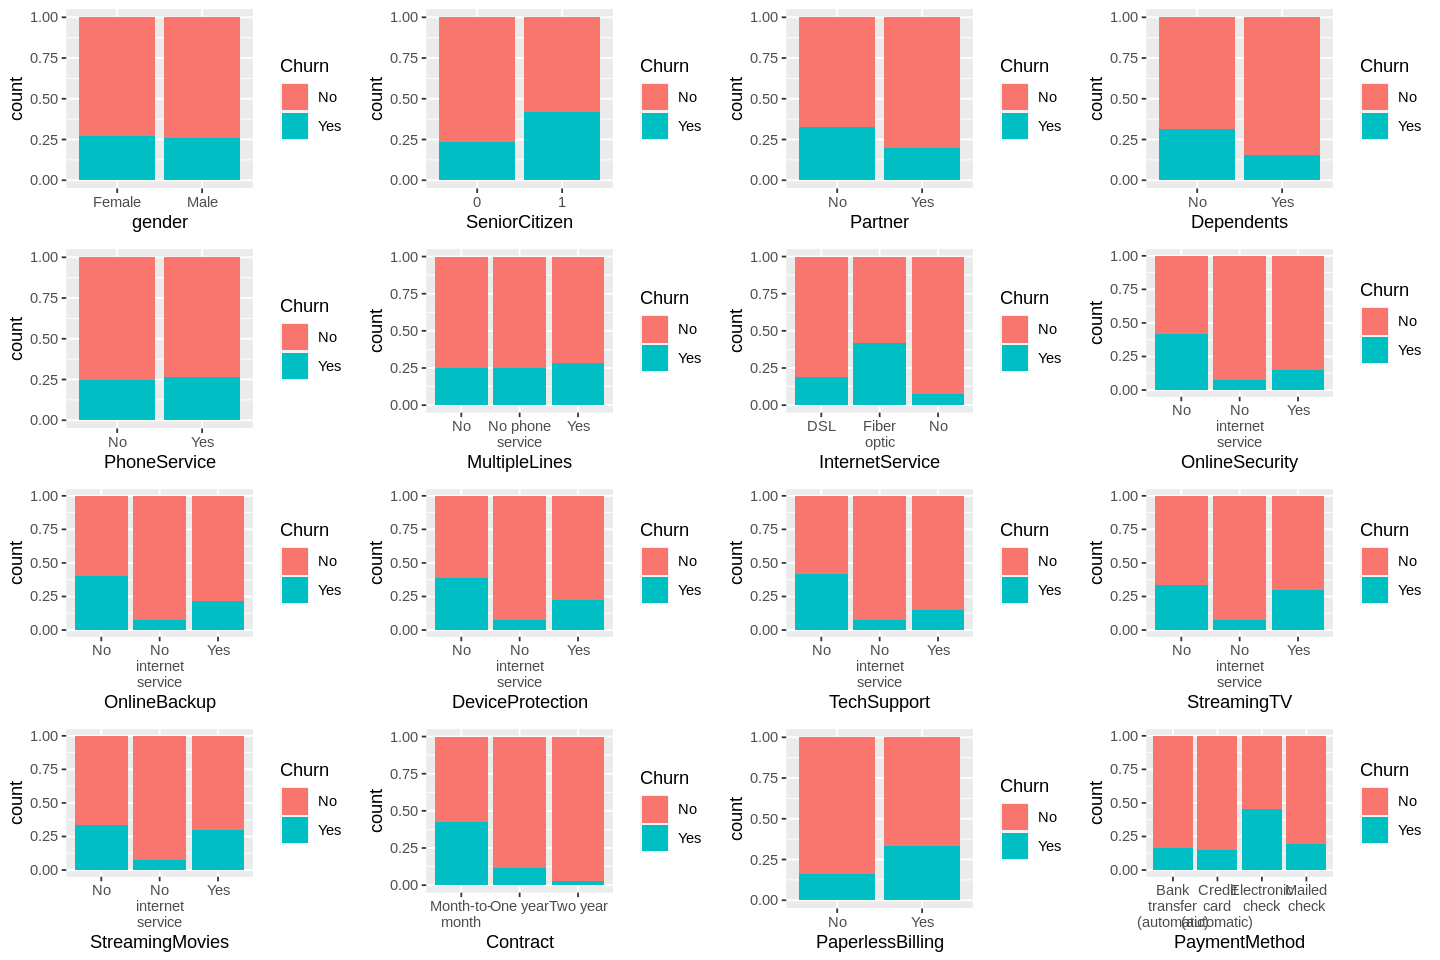

In [8]:
options(repr.plot.width = 12, repr.plot.height = 8)

churn_cat <- churn %>%
  select(-tenure, -MonthlyCharges, -TotalCharges) %>% 
  relocate(Churn)

plot_list <- list() 
for (i in 1:16){
  plt <- ggplot(churn_cat,aes_string(x=names(churn_cat)[i+1], fill = "Churn")) + geom_bar(position = 'fill') +
          scale_x_discrete(labels = function(x) str_wrap(x, width = 10))
  plot_list[[i]] <- plt
}
grid.arrange(grobs=plot_list, ncol = 4)
print("Figure 2")

From Figure 2 above, we can conclude we have a well-distributed dataset. The overall data does not seem to be skewed in any one direction and is fit for analysis. 

For the plot of Contract, a larger percentage of customers with monthly subscriptions have left when compared to customers with one or two-year contract. For internet service, a larger percentage of customers with Fiber optic have left when compared to customers with DSL or no internet service.

We also notice that PhoneService and InternetService are two more generalized categorical variables which are related to other categorical variables. For example, If a customer doesn't have internet service, then this customer will be classified as class "no internet service"  in other categorical variables, such as OnlineSecurity, OnlineBackup, StreamingTV, etc. Since we are focused on analyzing all the Telco customers no matter having internet service or not, we keep the variables PhoneService and InternetService and delete other more specific related variables.

In [9]:
churn <- churn %>% select(-MultipleLines, -OnlineSecurity, -OnlineBackup, 
                          -DeviceProtection, -TechSupport, -StreamingTV, -StreamingMovies)

Then we explore the relationship between three continuous variables and the response variable by using ggpairs().

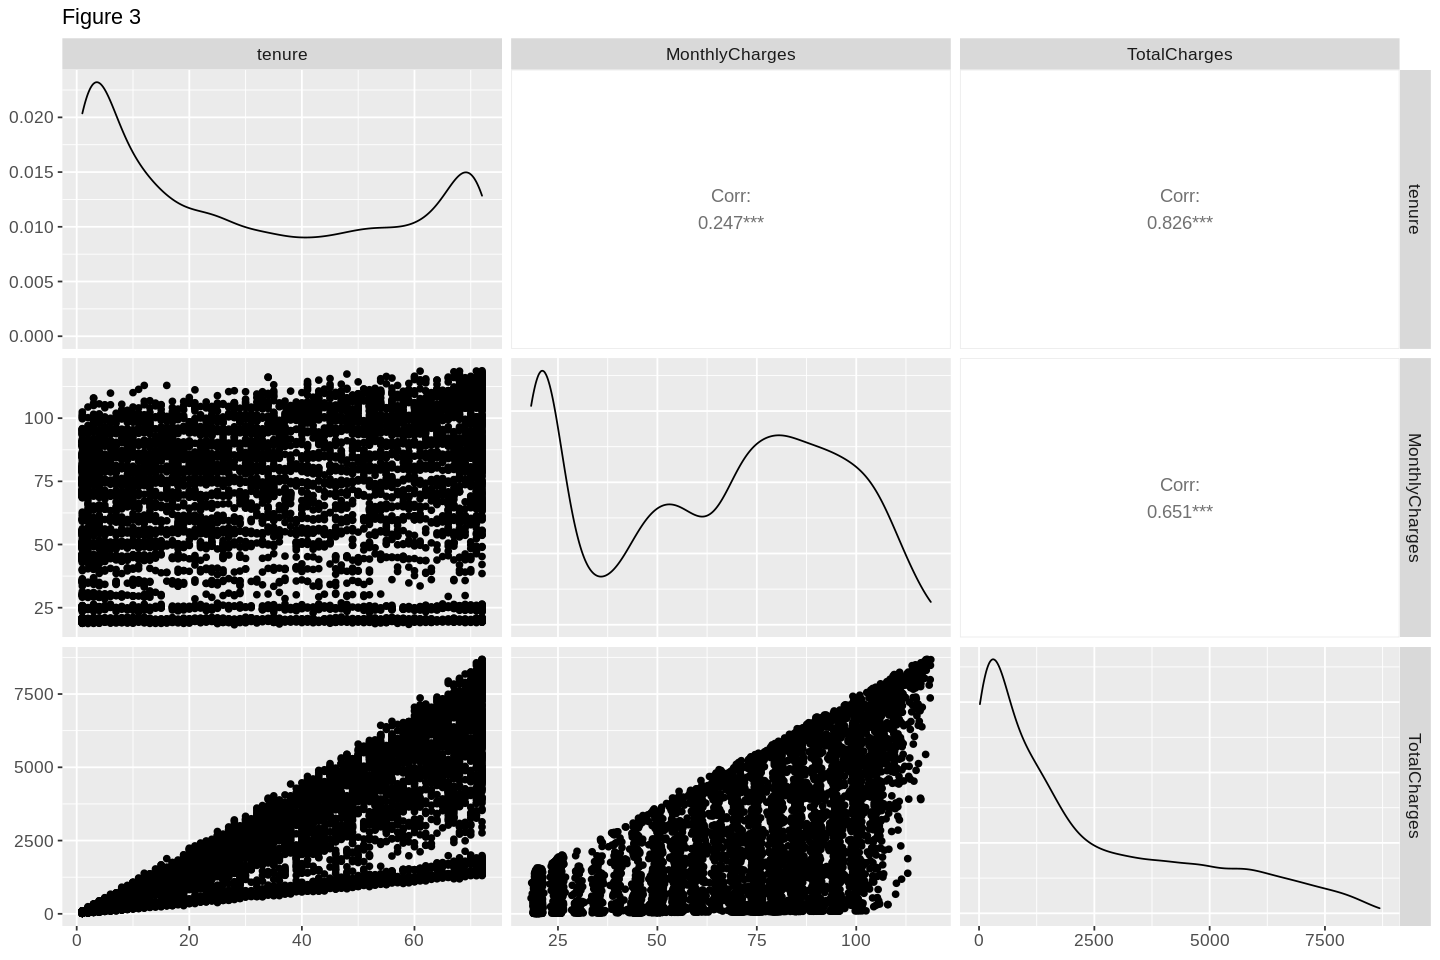

In [10]:
Internet_churn_pairplots <- churn %>% select(tenure, MonthlyCharges, TotalCharges) %>%
    ggpairs() + 
    theme(
        text = element_text(size = 13), 
        plot.title = element_text(face = "bold"), 
        axis.title = element_text(face = "bold"))+
    labs(subtitle = "Figure 3")

Internet_churn_pairplots

According to the Figure 3 above, we can see that the MonthlyCharges has a positive linear relationship with the TotalCharges, which makes sense in the reality that total charges is the sum of monthly charges. With the concern of the multicollinearity, we may exclude one of them to have more reliable statistical inferences and prediction.

### Feature Selection and Logistic Regression

Data was randomly split into training (75%) and test set (25%) to predict the accuracy of the classifier. We set the seed here to ensure that the R output is constant every time we rerun it, which also enables us to write report based on the R output.

In [11]:
set.seed(29)
internet_train <- churn %>%
                    slice_sample(prop = 0.75)
internet_test <- churn %>%
                    anti_join(internet_train)

Joining, by = c("gender", "SeniorCitizen", "Partner", "Dependents", "tenure",
"PhoneService", "InternetService", "Contract", "PaperlessBilling",
"PaymentMethod", "MonthlyCharges", "TotalCharges", "Churn")


Given that the response variable "Churn" is a binary variable, we fit a logistic regression to predict whether a telecom customer will leave the platform.

We first build the full model with all variables from our cleaned data.

In [12]:
# Fit full logistic regression model
internet_churn_full <- glm(Churn ~., data = internet_train, family = binomial)
tidy(internet_churn_full)
glance(internet_churn_full)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-0.1415055078,2.616635e-01,-0.5407919,5.886510e-01
genderMale,-0.0394536187,7.426813e-02,-0.5312322,5.952579e-01
SeniorCitizen1,0.2937216799,9.697266e-02,3.0289122,2.454360e-03
PartnerYes,0.0163993481,8.964680e-02,0.1829329,8.548507e-01
DependentsYes,-0.1703330390,1.033334e-01,-1.6483825,9.927420e-02
tenure,-0.0588096996,7.166149e-03,-8.2065969,2.275459e-16
PhoneServiceYes,-0.7045406343,1.697149e-01,-4.1513182,3.305658e-05
InternetServiceFiber optic,0.8462955204,1.551410e-01,5.4550071,4.897089e-08
InternetServiceNo,-0.3633381292,2.151238e-01,-1.6889725,9.122471e-02


null.deviance,df.null,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
6083.503,5273,-2208.138,4450.276,4561.975,4416.276,5257,5274


According to the table above, the AIC for the full logistic regression model is 4450.276 and BIC is 4561.975. Next, we perform the backward selection on the all variables.

In [13]:
# Backward selection
library(MASS)
internet_churn_back<- internet_churn_full %>% stepAIC(trace = FALSE)


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




In [14]:
tidy(internet_churn_back)
glance(internet_churn_back)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-0.0833619848,0.1805808533,-0.4616325,6.443449e-01
SeniorCitizen1,0.2951422900,0.0962781720,3.0655161,2.172947e-03
DependentsYes,-0.1621904621,0.0933016058,-1.7383459,8.214989e-02
tenure,-0.0596387985,0.0068174729,-8.7479333,2.172956e-18
PhoneServiceYes,-0.6719636638,0.1501085416,-4.4765185,7.587010e-06
InternetServiceFiber optic,0.8926607195,0.1099373918,8.1197189,4.672646e-16
InternetServiceNo,-0.4265991005,0.1490457464,-2.8622024,4.207081e-03
ContractOne year,-0.8189529810,0.1211782686,-6.7582496,1.396688e-11
ContractTwo year,-1.7378626796,0.2092659757,-8.3045640,1.001867e-16


null.deviance,df.null,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
6083.503,5273,-2208.387,4444.774,4536.761,4416.774,5260,5274


In the lecture, we learned that AIC and BIC are a good estimates of test MSE. Therefore, we compared these two metrics to select our predictive model.

The AIC for the reduced logistic regression model is 4444.774, which reduces from the AIC of the full model. The BIC for the reduced logistic regression model is 4536.761, which reduces from the BIC of the full model. After the backward variable selection, the variables SeniorCitizen, Dependents, tenure, PhoneService, InternetService, Contract, PaperlessBilling, PaymentMethod, and MonthlyCharges are kept. Three variables that are gender, Partner, and MonthlyCharges are removed. According to the Figure 3 above, the removal of MonthlyCharges is what we expected to avoid multicollinearity.

Then we choose the reduced logistic model as our final model, and make prediction on the testing set.

### Model Evaluation and Prediction Performance

In [15]:
# Make predictions on test data
probabilities <- predict(internet_churn_back, internet_test, type = "response")
predicted.classes1 <- ifelse(probabilities > 0.5, "Yes", "No")

# Prediction accuracy
observed.classes <- internet_test$Churn
mean(predicted.classes1 == observed.classes) %>% round(4)

[1] 0.8049

In [16]:
probabilities <- predict(internet_churn_full, internet_test, type = "response")
predicted.classes <- ifelse(probabilities > 0.5, "Yes", "No")

# Prediction accuracy
observed.classes <- internet_test$Churn
mean(predicted.classes == observed.classes) %>% round(4)

[1] 0.8043

In [17]:
# dummy classifier result(similar to the idea of scikit-learn DummyClassifier in python)
internet_prop_test =  internet_test %>% 
                 group_by(Churn) %>% 
                 summarise(prop = n() / nrow(internet_test))

internet_prop_test

Churn,prop
<fct>,<dbl>
No,0.7290359
Yes,0.2709641


The accuracy of the reduced logistic regression model is 80.49%, and the accuracy of the full logistic regression model is 80.43%. The reduced model's test accuracy is slightly higher than full model's test accuracy.

If we use dummy classifier to predict, the accuracy would be 72.9%. The dummy classifier is the baseline of a classification model, which looks at what label is most frequent in the training dataset and makes predictions based on that label in the testing set. 

In our case, since we have more (Churn: No) than (Churn: Yes) in the training set, the dummy classifier will predict all customers as (Churn: No) in the testing set. The proportion of the No in Churn is 72.9% in testing set, which means the test accuracy of dummy classifier is 72.9%.

Since 80.49% > 80.42 > 72.9%, we can say that our logistic regression models improve prediction accuracy as compared to the dummy classifier, and the reduced logistic regression model performs slightly better than the full model. This is matched with our expectation.

In [18]:
Internet_churn_confusion_matrix <- 
    confusionMatrix(
    data = as.factor(predicted.classes1),
    reference = as.factor(internet_test$Churn))
head(Internet_churn_confusion_matrix, 10)

$positive
[1] "No"

$table
          Reference
Prediction   No  Yes
       No  1155  219
       Yes  123  256

$overall
      Accuracy          Kappa  AccuracyLower  AccuracyUpper   AccuracyNull 
  8.049059e-01   4.727180e-01   7.855663e-01   8.232190e-01   7.290359e-01 
AccuracyPValue  McnemarPValue 
  9.085638e-14   2.791416e-07 

$byClass
         Sensitivity          Specificity       Pos Pred Value 
           0.9037559            0.5389474            0.8406114 
      Neg Pred Value            Precision               Recall 
           0.6754617            0.8406114            0.9037559 
                  F1           Prevalence       Detection Rate 
           0.8710407            0.7290359            0.6588705 
Detection Prevalence    Balanced Accuracy 
           0.7837992            0.7213516 

$mode
[1] "sens_spec"

$dots
list()


For the confusion matrix for the reduced model, we notice that the sensitivity is high (0.9038) but the specificity is much lower (0.5389). The high sensitivity means that the (correct number of churn predictions)/(total number of real churn) is high, and the high sensitivity is what we want. If we predict a group of customers are likely to churn and we want to keep them, we can offer them promotion deal.

Setting levels: control = No, case = Yes

Setting direction: controls < cases

Setting levels: control = No, case = Yes

Setting direction: controls < cases



[1] "Figure 4"


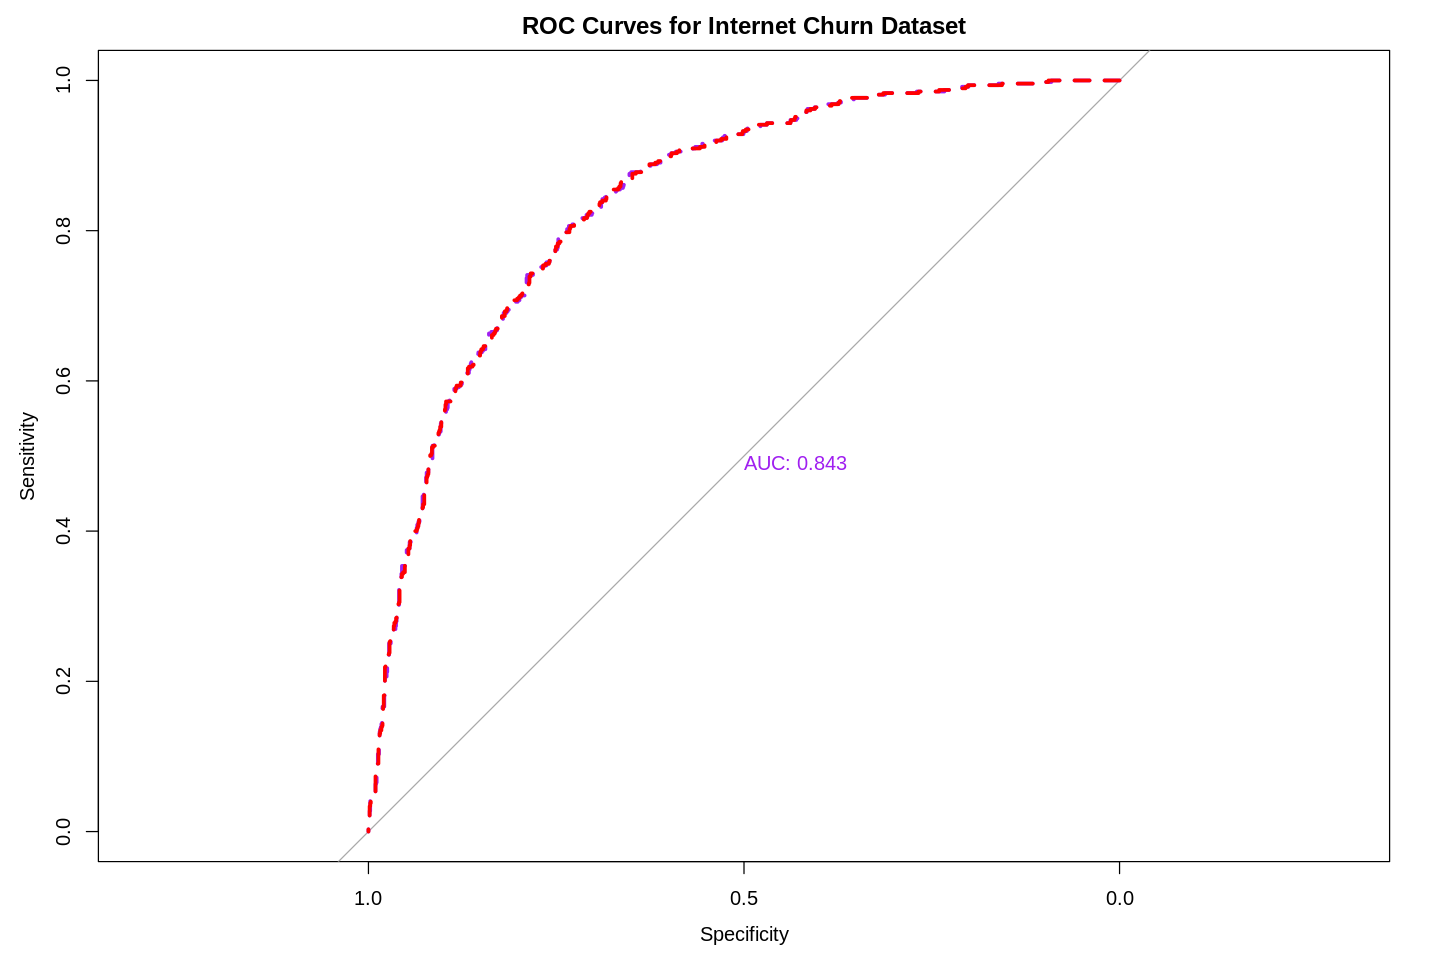

In [19]:
ROC_red_log <- roc(
  response = internet_test$Churn,
  predictor = predict(internet_churn_back, newdata = internet_test, type = "response")
)
ROC_full_log <- roc(
  response = internet_test$Churn,
  predictor = predict(internet_churn_full, newdata = internet_test, type = "response")
)
plot(ROC_red_log, col = "purple", print.auc = TRUE, lwd = 3, lty = 2,
  main = "ROC Curves for Internet Churn Dataset"
)
lines.roc(ROC_full_log, col = "red", lwd = 3, lty = 2)
print("Figure 4")

The Figure 4 above is a Receiver Operating Characteristic (ROC) curve, and AUC is area under ROC curve. We can see that the ROC curves for the full model and reduced model mostly overlap, which means these two models perform similarly. Meanwhile, the AUC is 0.843, which means the model has very high change to distinguish the positive class values (Churn: Yes) from the negative class values (Churn: No).

# Discussion

From the results discussed above, we found that the model made by removing certain variables using backward variable selection is a better fit than the full logistic regression model, as it reduces the problem of multicollinearity by removing the correlated variables. Finally, we choose the reduced logistic model as our final model based on the lower AIC and lower BIC values. The reduced logistic regression model has a test accuracy of 80.49%, a sensitivity of 90.37%, and an AUC value of 0.843, which are statistically good in terms of prediction.

The results are what we expected to find, but the performance of the reduced logistic regression doesn't meet our expectations given that we expect the reduced model fits much better than the full model. According to the results above, the difference in the test accuracy between reduced model and full model is only 0.8049 - 0.8043 = 0.0006. Due to the randomness of splitting the testing set, there is a possibility that the full model performs better than the reduced model in other out-of-sample data. 

When we treat the problem as a binary classification problem, we predict whether a customer would churn or not at a particular point in time, when the data was collected. Here we are actually interested in the time till the event of churn occurs, so we think one way to get better results is using right censored survival analysis instead of the logistic regression. If customers have not churned yet, it would be more useful to understand when they are likely to churn so that we can offer them promotions etc.

For future research, we recommend Telco repeat this study and continue collecting data. With more customer-related data, it enables business analysts to find trends in future time periods and come up with new business strategies to keep customers. From our study and future research, Telco can utilize the logistic regression model to improve customer retention programs for month-to-month contract customers and adapt to demographic changes.

# References

Char. (2017). Telco Customer Churn. Telco Customer Churn | Kaggle. Retrieved November 8, 2022, from https://www.kaggle.com/datasets/blastchar/telco-customer-churn

Frankenfield. (2022, May 18). Churn Rate. Investopedia. Retrieved November 5, 2022, from https://www.investopedia.com/terms/c/churnrate.asp

Almohaimmeed, B. (2019). Pillars of customer retention: An empirical study on the influence of customer satisfaction, customer loyalty, customer profitability on customer retention. Serbian Journal of Management, 14(2), 421–435. https://doi.org/10.5937/sjm14-15517